In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


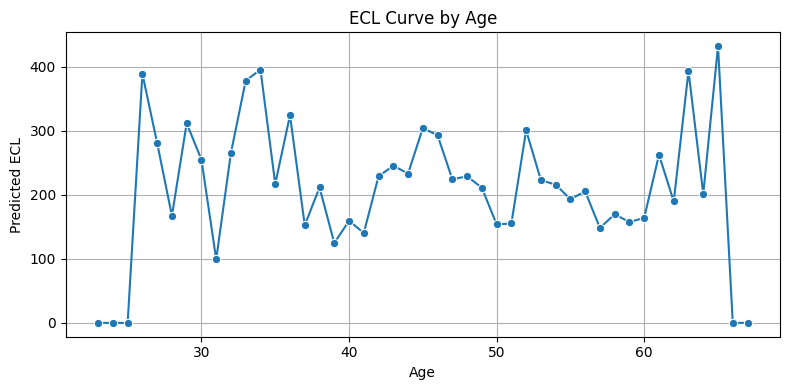

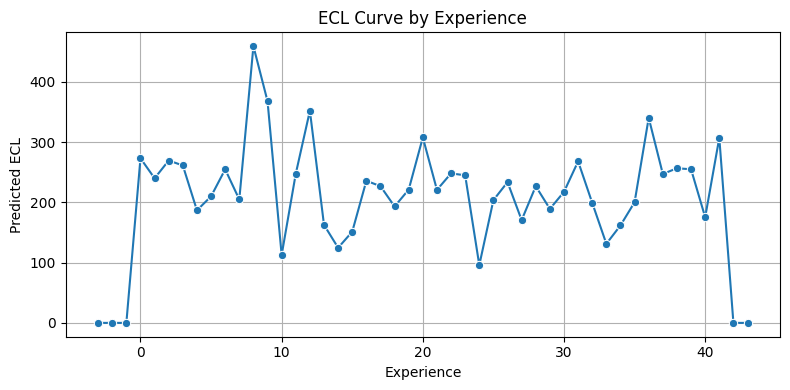

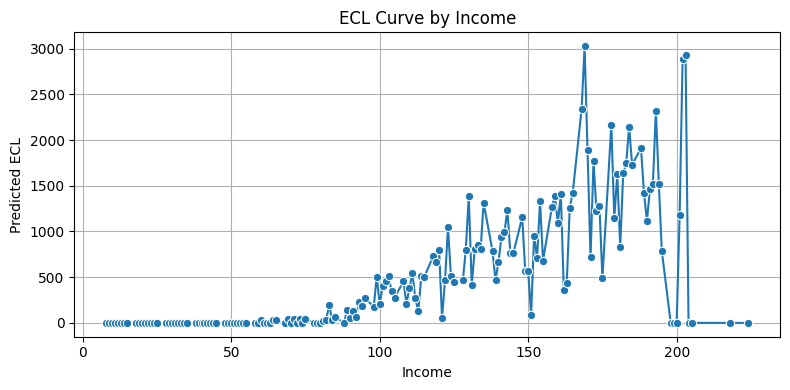

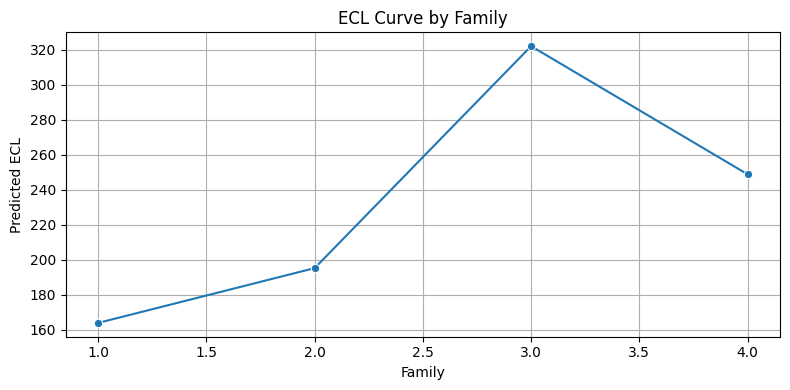

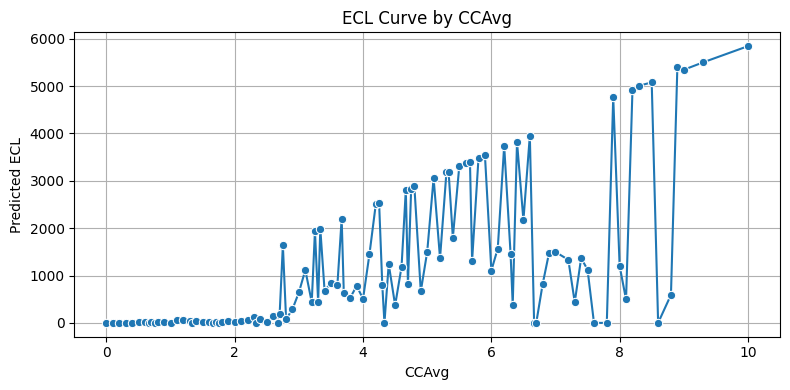

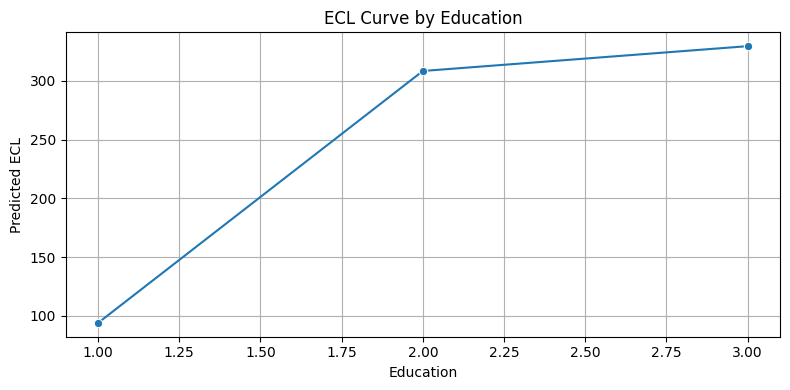

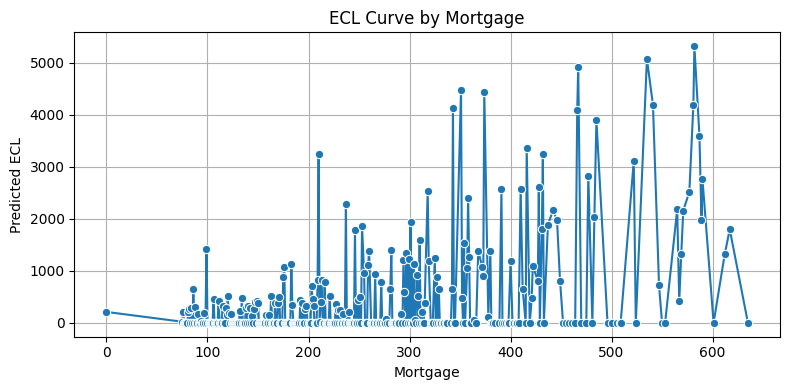

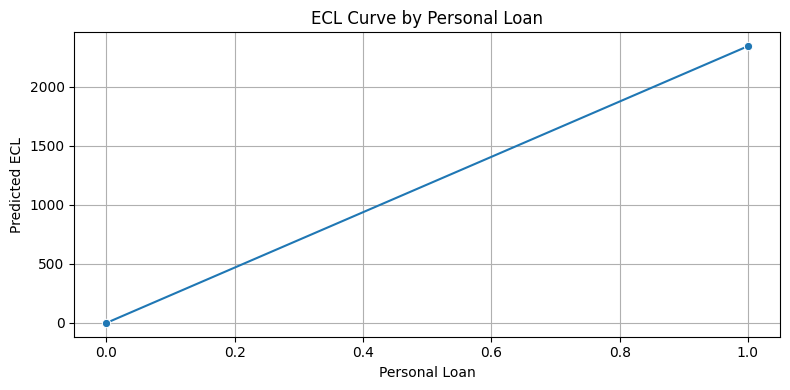

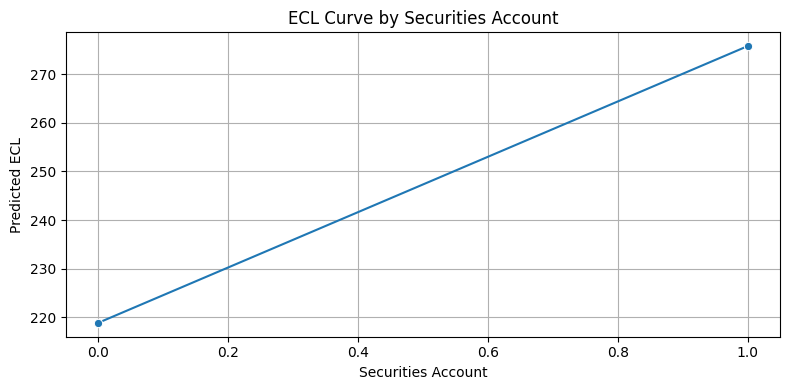

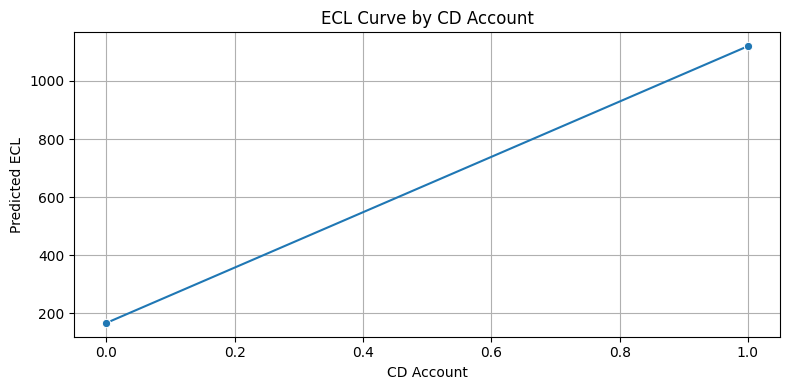

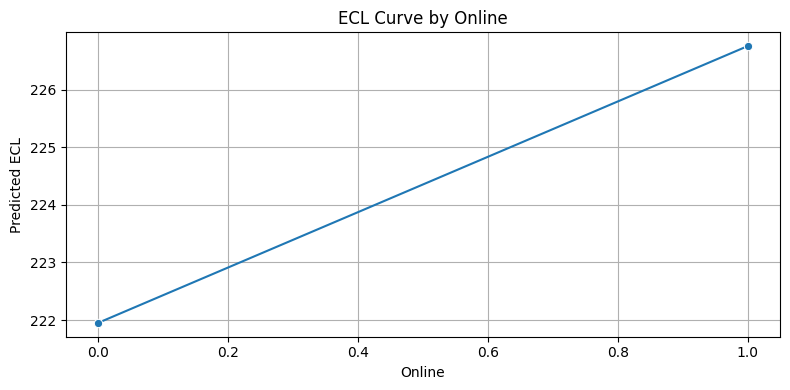

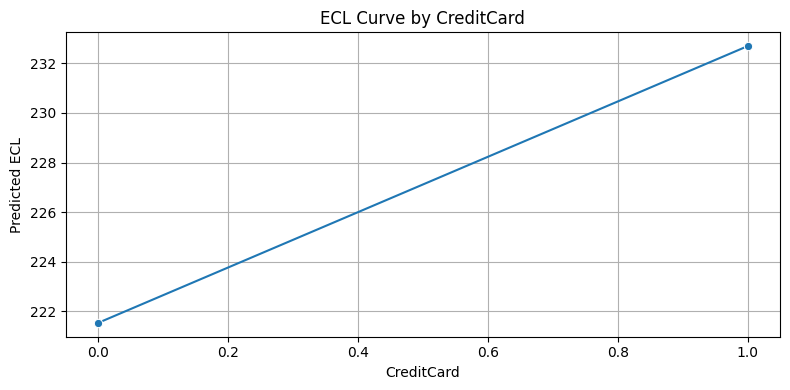

In [2]:
df = pd.read_excel("../backend/Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")

print(df.head())

# Drop non-relevant columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

# Simulate ECL value
df['EAD'] = df['CCAvg'] * 1000
df['PD'] = df['Personal Loan']  # Proxy: 1 if defaulted
df['LGD'] = 0.6
df['ECL'] = df['PD'] * df['LGD'] * df['EAD']

# Drop columns that were used for ECL
df.drop(['PD', 'LGD', 'EAD'], axis=1, inplace=True)

# Feature/Target split
X = df.drop('ECL', axis=1)
y = df['ECL']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Segment-wise ECL plot (by Education)
df['Pred_ECL'] = model.predict(scaler.transform(df.drop('ECL', axis=1)))


# Loop through all features
for feature in X.columns:
    plt.figure(figsize=(8, 4))

    grouped = df.groupby(feature)['Pred_ECL'].mean().reset_index()

    # Sort the grouped values for a smooth line
    grouped = grouped.sort_values(feature)

    sns.lineplot(data=grouped, x=feature, y='Pred_ECL', marker='o')

    plt.title(f"ECL Curve by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Predicted ECL")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

